# Analysis
==========================================================================================

### Thinking
* In the NFL, age defintely matters
* Certain players has lifestyles that may make them more prone to injury and worse production
    * For example: running backs have very short lifespans
    * on the other hand, quarterbacks can play for a very long time without much drop in quality
* On the other hand, a more experienced player may make less mistakes
    * What is the tradeoff between experience and lifespan?
    * What traits hold better than others
* At what point does it become dangerous to rely on an "old" player at QB, RB, WR?
* Furthermore, what are some signs that a player's production will fall?
   
==========================================================================================
### Data Collection
* Data is available from 2016-2021 for multiple categories
* Players have their stats available in this same time period, but advanced stats and defensive aren't tracked until 2018
    * 
* I would like to look at the advanced stats later
    * In this analysis, I will stick to looking at all data, but in the future, this may change
    
==========================================================================================
### Method of Analysis
##### Numbers:
* Mainly, I want to look at the performance of certain stats and how they change as a player ages
    * I will focus primarily on QBs, RBs, and WRs
    * However, I will
* Will calculate the difference of a player's draft position and final standing and its 
    * For example: a player with an ADP (Average Draft Position) of RB12 but finishes the year as the RB5 would be +7
        * Flipping the ADP and Finish would be a -7 rating
        * However, finishing at RB5 from ADP12 is more important than finishing RB24 from ADP31
            * The gap in points is simply too large
            
##### Cleaning + Preparing
* Bring in the data and store in pandas dataframes
    * Need to bring in:
        * ADP (2016-2021 Just Overall)
        * Final Seasonal Numbers
        * RedZone Passing, Receiving, Rushing
        * TeamOffense:
            * Conversions
            * Drive averages
            * Passing Offense
            * Rushing Offense
            * Scoring Offense
* Create a Hashing System to link up team names with their abreviations
* Link up player data (Player Team -> Team scoring/passing/receiving/rushing)
* Divide up players by position for comparison
* Scale the numbers (for SVM)

In [3]:
#Loading in team and player data
import numpy as np
import pandas as pd

rnk = []
teams = []
cols=['b', 'g', 'r', 'c', 'm', 'y', 'k','w']
for i in range(2016, 2022):
    address = "Data/Merged/" + str(i) + ".csv"
    temp = pd.read_csv(address, index_col=[0])
    temp.fillna(0, inplace=True)
    temp.columns = [str(col) + '_TEAMS' for col in temp.columns]
    teams.append(temp)
    address = "Data/MergedPlayers/" + str(i) + ".csv"
    temp = pd.read_csv(address, index_col=[0])
    temp.fillna(0, inplace=True)
    temp['POS'] = temp['POS'].astype("string")
    temp['Tmrank'] = temp['Tmrank'].astype("string")
    temp['FantPos'] = temp['FantPos'].astype("string")
    temp = temp[temp['Tmrank'] !="0"]
    temp.columns = [str(col) + '_PLAYERS' for col in temp.columns]
    rnk.append(temp)
#Loading in the combined team and player data
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
# Loading in the ultimate combined csv
COMPLETE = []
cols=['b', 'g', 'r', 'c', 'm', 'y', 'k','w']
for i in range(6):
    address = "Data/TEST/" + str(i) + ".csv"
    temp = pd.read_csv(address, index_col=[0])
    COMPLETE.append(temp)
full = pd.concat(COMPLETE, ignore_index=True)

In [4]:
def showData(x, y, column):
    plt.scatter(x, y)
    plt.show()
    print(column)
    print("Number of items: " + str(len(x)))
    print("Mean: " + str(x.mean()))
    print("Median: " + str(x.median()))
    print("STD: " + str(x.std()))
def showDataXY(x, y, column):
    plt.scatter(x, y)
    plt.show()
    print(column)
    print("Number of items: " + str(len(x)))
    print("Mean X: " + str(x.mean()))
    print("Median X: " + str(x.median()))
    print("STD X: " + str(x.std()))
    print("Mean Y: " + str(y.mean()))
    print("Median Y: " + str(y.median()))
    print("STD Y: " + str(y.std()))

#### Takeaways
* Average age of a ___ in the top 32 of fantasy performers:
    * WR:
        * Mean: 25.9, Median: 26.0, STD: 2.55
    * RB:
        * Mean: 24.7, Median: 24.0, STD: 2.61
    * QB:
        * Mean: 29.30, Median: 28.0, STD: 5.91

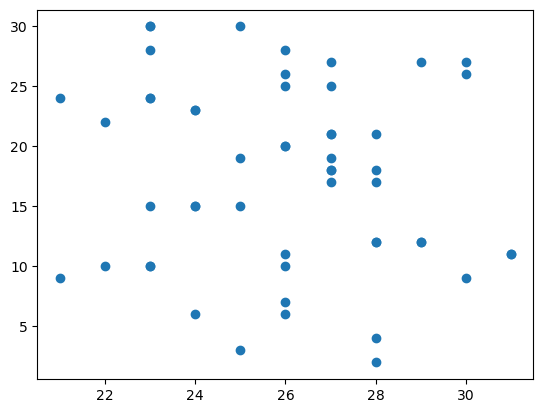

Age & Fantasy Rank of WRs in Top 32
Mean: 25.943396226415093
Median: 26.0
STD: 2.5526388633938337


In [17]:
x = full.loc[(full['FinishRank_PLAYERS'] < 32) & (full['Pos_PLAYERS'] == 'WR')]['Age_PLAYERS']
y = full.loc[(full['FinishRank_PLAYERS'] < 32) & (full['Pos_PLAYERS'] == 'WR')]['FinishRank_PLAYERS']
showData(x, y, "Age & Fantasy Rank of WRs in Top 32")

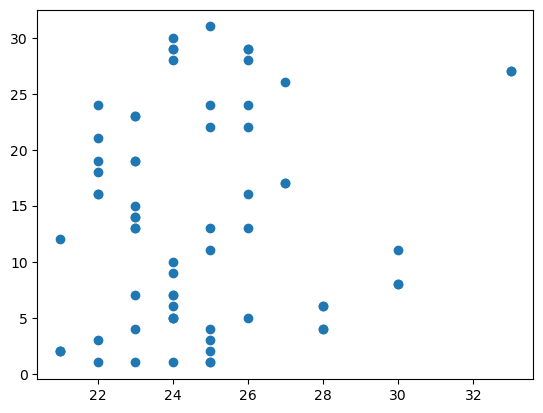

Age & Fantasy Rank of RBs in Top 32
Mean: 24.70149253731343
Median: 24.0
STD: 2.6112514436982495


In [19]:
x = full.loc[(full['FinishRank_PLAYERS'] < 32) & (full['Pos_PLAYERS'] == 'RB')]['Age_PLAYERS']
y = full.loc[(full['FinishRank_PLAYERS'] < 32) & (full['Pos_PLAYERS'] == 'RB')]['FinishRank_PLAYERS']
showData(x, y, "Age & Fantasy Rank of RBs in Top 32")

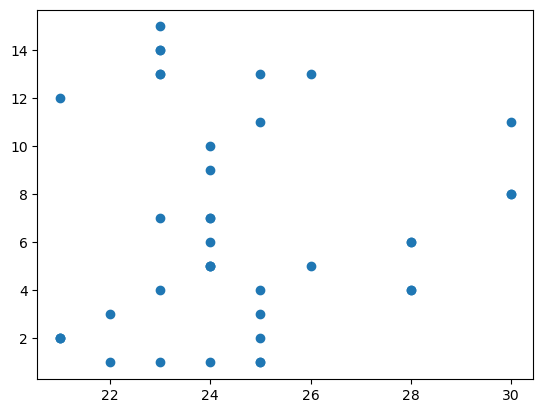

Age & Fantasy Rank of RBs in Top 16
Mean: 24.53846153846154
Median: 24.0
STD: 2.447836357685721


In [23]:
x = full.loc[(full['FinishRank_PLAYERS'] < 16) & (full['Pos_PLAYERS'] == 'RB')]['Age_PLAYERS']
y = full.loc[(full['FinishRank_PLAYERS'] < 16) & (full['Pos_PLAYERS'] == 'RB')]['FinishRank_PLAYERS']
showData(x, y, "Age & Fantasy Rank of RBs in Top 16")

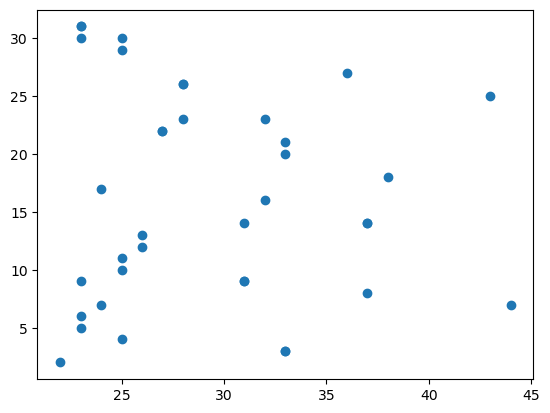

Age & Fantasy Rank of QBs in Top 32
Mean: 29.2972972972973
Median: 28.0
STD: 5.910747578516354


In [24]:
x = full.loc[(full['FinishRank_PLAYERS'] < 32) & (full['Pos_PLAYERS'] == 'QB')]['Age_PLAYERS']
y = full.loc[(full['FinishRank_PLAYERS'] < 32) & (full['Pos_PLAYERS'] == 'QB')]['FinishRank_PLAYERS']
showData(x, y, "Age & Fantasy Rank of QBs in Top 32")

### RB's and their age
* ADP < 64, drafted too high:
    * Mean Age: 24.95
    * Median Age: 25.00
    * Mean Net Position: -16.7
    * Median Net Position: -17.0
* Drafted too high:
    * Mean Age: 24.96
    * Median: 24.0
    * Mean Net Position: -17.62
    * Median Net Position: -17.3
* ADP < 64, drafted too low:
    * Mean Age: 24.56
    * Median Age: 24.0
    * Mean Net Position: 13.1
    * Median Net Position: 6.2
* Drafted too low:
    * Mean Age: 25.33
    * Median Age: 25.0
    * Mean Net Position: 24.69
    * Median Net Position: 22.0

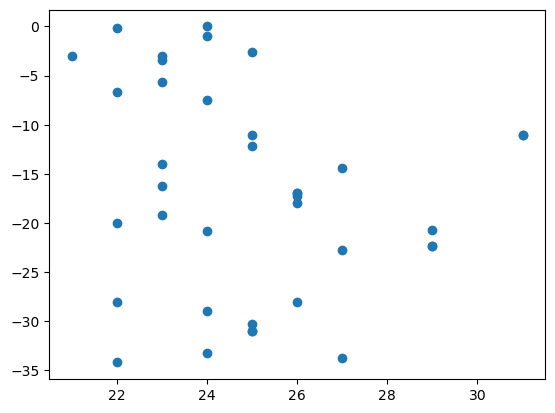

Age of RBS with an ADP of less than 64 and were drafted too high on average + Their Difference in Draft Position & Final Rank
Mean X: 24.945945945945947
Median X: 25.0
STD X: 2.5160147714849233
Mean Y: -16.72162162162162
Median Y: -17.0
STD Y: 10.547646792192694


In [32]:
x = full.loc[(full['ADP_PLAYERS'] < 64) & (full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > -36) & (full['RankDiff_PLAYERS'] <= 0)]['Age_PLAYERS']
y = full.loc[(full['ADP_PLAYERS'] < 64) & (full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > -36) & (full['RankDiff_PLAYERS'] <= 0)]['RankDiff_PLAYERS']
showDataXY(x, y, "Age of RBS with an ADP of less than 64 and were drafted too high on average + Their Difference in Draft Position & Final Rank")

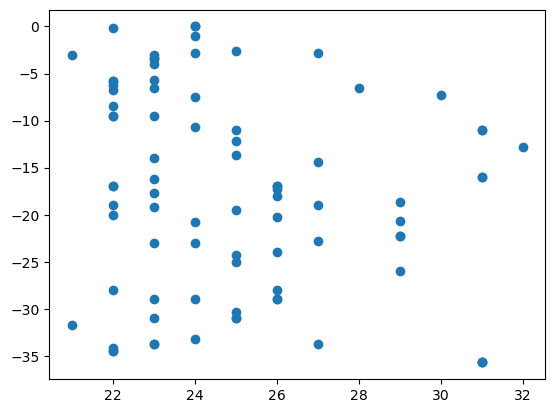

Age of RBS that were drafted too high on average + Their Difference in Draft Position & Final Rank
Mean X: 24.97590361445783
Median X: 24.0
STD X: 2.9090938309765457
Mean Y: -17.622891566265068
Median Y: -17.3
STD Y: 10.719953190892582


In [38]:
x = full.loc[(full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > -36) & (full['RankDiff_PLAYERS'] <= 0)]['Age_PLAYERS']
y = full.loc[(full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > -36) & (full['RankDiff_PLAYERS'] <= 0)]['RankDiff_PLAYERS']
showDataXY(x, y, "Age of RBS that were drafted too high on average + Their Difference in Draft Position & Final Rank")

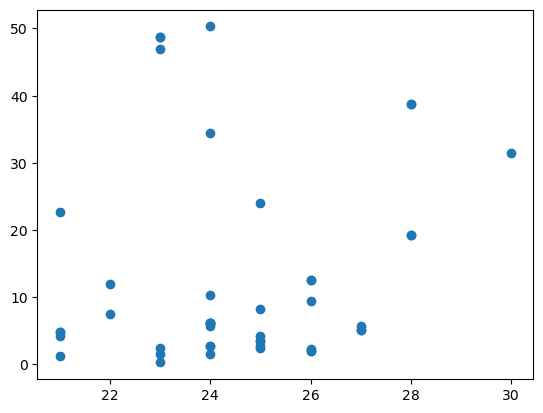

Age of RBS with an ADP of less than 64 and were drafted too low on average + Their Difference in Draft Position & Final Rank
Mean X: 24.555555555555557
Median X: 24.0
STD X: 2.1485254515973535
Mean Y: 13.144444444444447
Median Y: 6.2
STD Y: 15.01975298724915


In [39]:
x = full.loc[(full['ADP_PLAYERS'] < 64) & (full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > 0)]['Age_PLAYERS']
y = full.loc[(full['ADP_PLAYERS'] < 64) & (full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > 0)]['RankDiff_PLAYERS']
showDataXY(x, y, "Age of RBS with an ADP of less than 64 and were drafted too low on average + Their Difference in Draft Position & Final Rank")

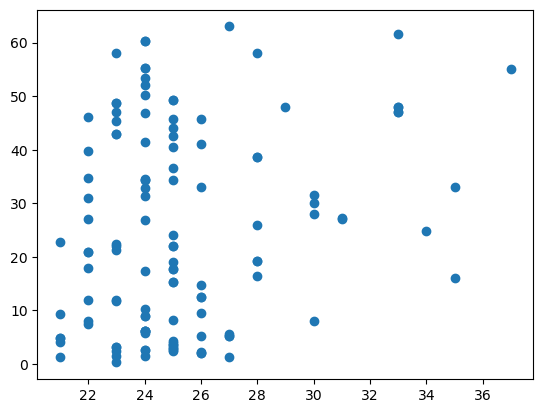

Age of RBS with an ADP of less than 64 and were drafted too low on average + Their Difference in Draft Position & Final Rank
Mean X: 25.328
Median X: 25.0
STD X: 3.2423010546573647
Mean Y: 24.694399999999995
Median Y: 22.0
STD Y: 18.56560861447333


In [37]:
x = full.loc[(full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > 0) & (full['RankDiff_PLAYERS'] < 64)]['Age_PLAYERS']
y = full.loc[(full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > 0) & (full['RankDiff_PLAYERS'] < 64)]['RankDiff_PLAYERS']
showDataXY(x, y, "Age of RBS that were drafted too low on average + Their Difference in Draft Position & Final Rank")

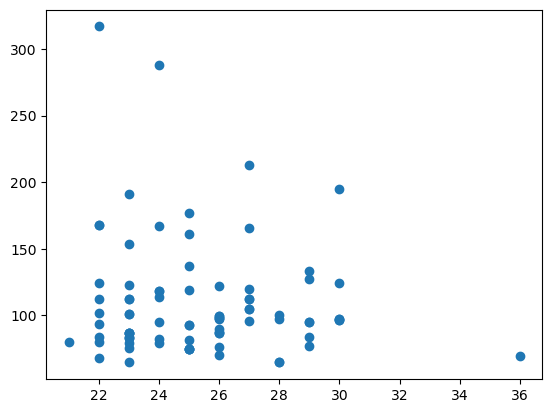

Age of RBS that were drafted too low on average + Their Difference in Draft Position & Final Rank
Number of items: 84
Mean X: 25.345238095238095
Median X: 25.0
STD X: 2.730876762952675
Mean Y: 109.23809523809521
Median Y: 96.9
STD Y: 43.843384754026644


In [41]:
x = full.loc[(full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > 0) & (full['RankDiff_PLAYERS'] > 64)]['Age_PLAYERS']
y = full.loc[(full['Pos_PLAYERS'] == 'RB') & (full['RankDiff_PLAYERS'] > 0) & (full['RankDiff_PLAYERS'] > 64)]['RankDiff_PLAYERS']
showDataXY(x, y, "Age of RBS that were drafted too low on average + Their Difference in Draft Position & Final Rank")

### Expected Team Points
* Fantasy Players Score More Than 250 Points:
    * WR (56):
        * Team EXP Points Mean: 107.8
        * Team EXP Points Median: 115.16
        * Mean Fantasy Points: 293.43
        * Median Fantasy Points: 286.65
    * RB (42):
        * Team EXP Points Mean: 94.98
        * Team EXP Points Median: 93.22
        * Mean Fantasy Points: 310.49
        * Meadian Fantasy Points: 298.3
* Fantasy Players Score Between 200 and 250 Points:
    * WR (85):
        * Team EXP Points Mean: 50.27
        * Team EXP Points Median: 47.57
        * Mean Fantasy Points: 226.06
        * Median Fantasy Points: 225.8
    * RB (45):
        * Team EXP Points Mean: 42.93
        * Team EXP Points Median: 47.67
        * Mean Fantasy Points: 221.73
        * Meadian Fantasy Points: 219.4
* Fantasy Players Score Between 150 and 200 Points:
    * WR (119):
        * Team EXP Points Mean: 24.54
        * Team EXP Points Median: 30.4
        * Mean Fantasy Points: 176.17
        * Median Fantasy Points: 179.5
    * RB (77):
        * Team EXP Points Mean: 26.7
        * Team EXP Points Median: 36.9
        * Mean Fantasy Points: 177.2
        * Median Fantasy Points: 176.3
        
##### Takeaways
* Good RBs are hard to find
* The top end RBs are better than top end WRs
* Top End WRs will come in offenses that are very good
* Top End RBs will be on good offenses, not nessecarily the best
* There are are a lot more >200 point scoring WRs (141) vs RBs (87)
* WRs are more reliant on system than RBs

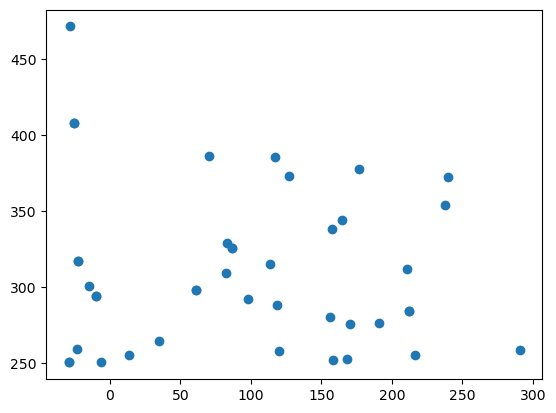

PPR Score of RB's that scored more than 250 points in a season and their respective team's expected offensive points
Number of items: 42
Mean X: 94.97595238095239
Median X: 92.155
STD X: 93.21764598101359
Mean Y: 310.4928571428571
Median Y: 298.3
STD Y: 52.546459781226645


In [57]:
x = full.loc[(full['PPR_PLAYERS'] > 250) & (full['Pos_PLAYERS'] == 'RB')]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 250) & (full['Pos_PLAYERS'] == 'RB')]['PPR_PLAYERS']
showDataXY(x, y, "PPR Score of RB's that scored more than 250 points in a season and their respective team's expected offensive points")

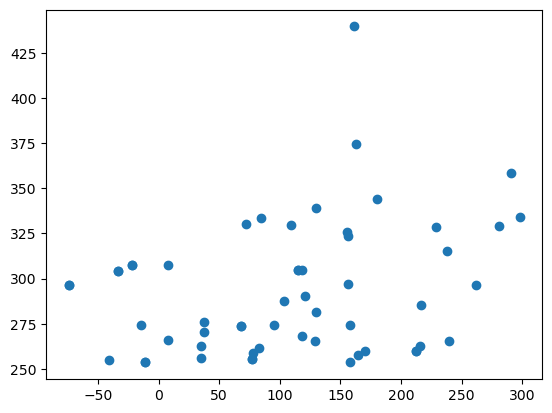

Age of RBS that were drafted too low on average + Their Difference in Draft Position & Final Rank
Number of items: 56
Mean X: 107.67839285714288
Median X: 115.16
STD X: 95.80042324402208
Mean Y: 293.42857142857144
Median Y: 286.65
STD Y: 36.664269028259966


In [53]:
x = full.loc[(full['PPR_PLAYERS'] > 250) & (full['Pos_PLAYERS'] == 'WR')]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 250) & (full['Pos_PLAYERS'] == 'WR')]['PPR_PLAYERS']
showDataXY(x, y, "PPR Score of WR's that scored more than 250 points in a season and their respective team's expected offensive points")

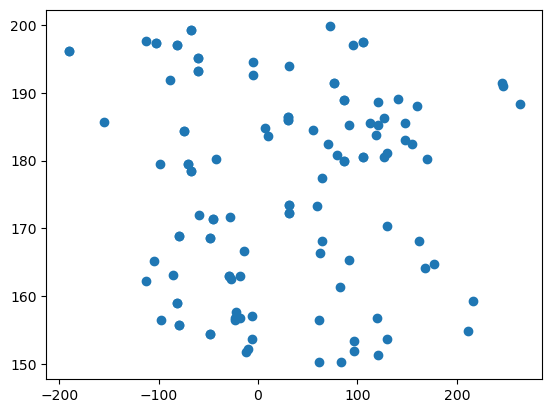

PPR Score of WR's that scored more than 150 < x < 200 points in a season and their respective team's expected offensive points
Number of items: 119
Mean X: 24.53680672268909
Median X: 30.41
STD X: 97.4067746045885
Mean Y: 176.16890756302527
Median Y: 179.5
STD Y: 14.818642335277364


In [55]:
x = full.loc[(full['PPR_PLAYERS'] > 150) & (full['PPR_PLAYERS'] < 200) & (full['Pos_PLAYERS'] == 'WR')]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 150) & (full['PPR_PLAYERS'] < 200) &(full['Pos_PLAYERS'] == 'WR')]['PPR_PLAYERS']
showDataXY(x, y, "PPR Score of WR's that scored more than 150 < x < 200 points in a season and their respective team's expected offensive points")

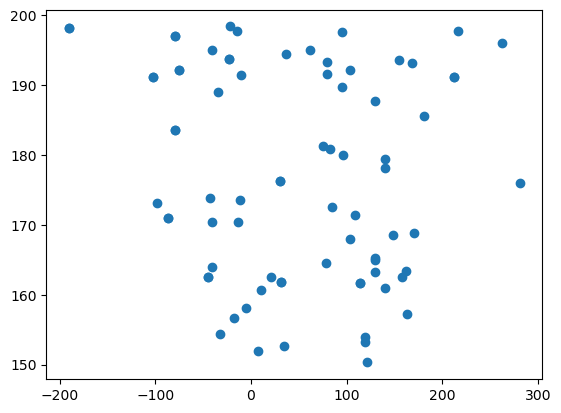

PPR Score of RB's that scored more than 150 < x < 200 points in a season and their respective team's expected offensive points
Number of items: 77
Mean X: 46.724935064935075
Median X: 36.91
STD X: 102.90519549340162
Mean Y: 177.23246753246752
Median Y: 176.3
STD Y: 15.005020576972873


In [58]:
x = full.loc[(full['PPR_PLAYERS'] > 150) & (full['PPR_PLAYERS'] < 200) & (full['Pos_PLAYERS'] == 'RB')]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 150) & (full['PPR_PLAYERS'] < 200) &(full['Pos_PLAYERS'] == 'RB')]['PPR_PLAYERS']
showDataXY(x, y, "PPR Score of RB's that scored more than 150 < x < 200 points in a season and their respective team's expected offensive points")

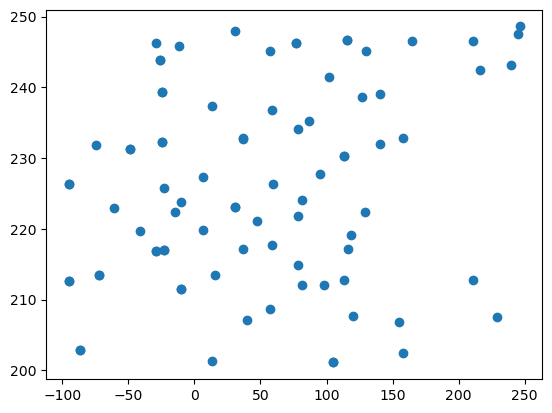

PPR Score of WR's that scored more than 200 < x < 250 points in a season and their respective team's expected offensive points
Number of items: 85
Mean X: 50.27388235294114
Median X: 47.57
STD X: 88.93209531105494
Mean Y: 226.0564705882352
Median Y: 225.8
STD Y: 14.014069860737267


In [62]:
x = full.loc[(full['PPR_PLAYERS'] > 200) & (full['PPR_PLAYERS'] < 250) & (full['Pos_PLAYERS'] == 'WR')]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 200) & (full['PPR_PLAYERS'] < 250) &(full['Pos_PLAYERS'] == 'WR')]['PPR_PLAYERS']
showDataXY(x, y, "PPR Score of WR's that scored more than 200 < x < 250 points in a season and their respective team's expected offensive points")

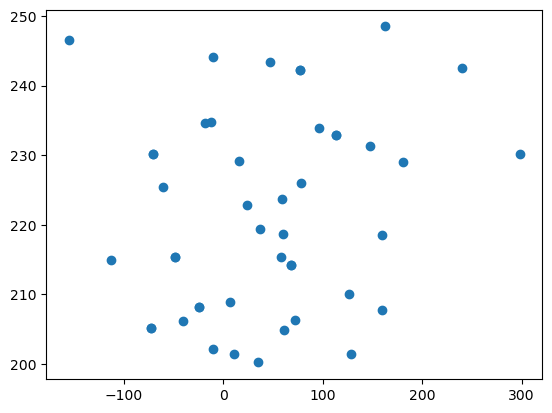

PPR Score of RB's that scored more than 200 < x < 250 points in a season and their respective team's expected offensive points
Number of items: 45
Mean X: 42.923111111111105
Median X: 47.57
STD X: 93.4818015547368
Mean Y: 221.73333333333332
Median Y: 219.4
STD Y: 14.231239644464631


In [61]:
x = full.loc[(full['PPR_PLAYERS'] > 200) & (full['PPR_PLAYERS'] < 250) & (full['Pos_PLAYERS'] == 'RB')]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 200) & (full['PPR_PLAYERS'] < 250) &(full['Pos_PLAYERS'] == 'RB')]['PPR_PLAYERS']
showDataXY(x, y, "PPR Score of RB's that scored more than 200 < x < 250 points in a season and their respective team's expected offensive points")

### Expected Team Points 
* Negative
    * Scored more than 50 points (520):
        * Mean Expected Team Points: -54.22
        * Median Expected Team Points: -45.33
        * Mean Fantasy Points Scored: 146.65
        * Median Fantasy Points Scored: 138.4
    * First ~130 Negative Points (144):
        * Mean Expected Team Points: -15.27
        * Median Expected Team Points: -13.65
        * Mean Fantasy Points Scored: 152.6
        * Median Fantasy Points Scored: 150.5
    * WR with more than 225 points(24):
        * Mean Team Score% : 33.45
        * Median Team Score%: 33.15
        * Mean Fantasy Points: 256.17
        * Median Fantasy Points: 244.17
    * RB with more than 225 points (19):
        * Mean Team Score% : 33.96
        * Median Team Score%: 33.9
        * Mean Fantasy Points: 287.71
        * Median Fantasy Points: 250.6
* Positive
    * Scored more than 50 points (802):
        * Mean Expected Team Points: 114.47
        * Median Expected Team Points: 105.24
        * Mean Fantasy Points Scored: 171.01
        * Median Fantasy Points Scored: 152.45
    * First ~130 Positive Points (132):
        * Mean Expected Team Points: 26.87
        * Median Expected Team Points: 30.86
        * Mean Fantasy Points Scored: 159.1
        * Median Fantasy Points Scored: 152
    * WR with more than 225 points(75):
        * Mean Team Score% : 42.05
        * Median Team Score%: 42.6
        * Mean Fantasy Points: 273.52
        * Median Fantasy Points: 260.1
    * RB with more than 225 points (19):
        * Mean Team Score% : 42.97
        * Median Team Score%: 43.3
        * Mean Fantasy Points: 285.67
        * Median Fantasy Points: 276.6

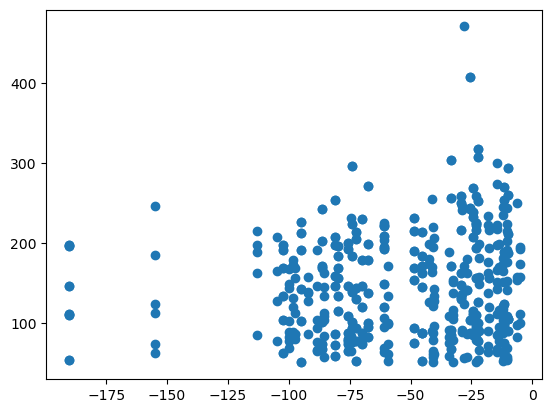

Teams with a negative EXP Points and their players final PPR scores
Number of items: 520
Mean X: -54.21594230769224
Median X: -45.33
STD X: 38.44343269551739
Mean Y: 146.6578846153845
Median Y: 138.4
STD Y: 66.92029664770125


In [10]:
x = full.loc[(full['PPR_PLAYERS'] > 50) & (full['EXP_TEAMS'] < 0)]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 50) &(full['EXP_TEAMS'] < 0)]['PPR_PLAYERS']
showDataXY(x, y, "Teams with a negative EXP Points and their players final PPR scores")

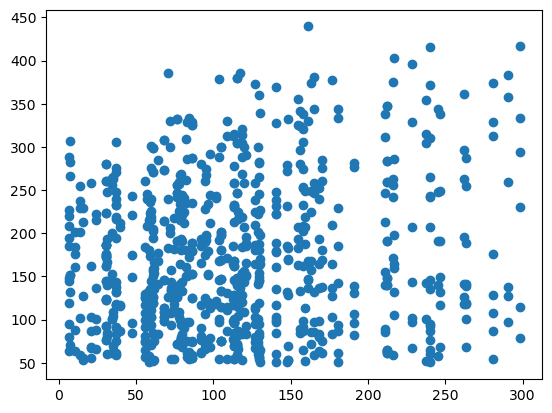

Teams with a positive EXP Points and their players final PPR scores
Number of items: 802
Mean X: 114.46605985037442
Median X: 105.24
STD X: 68.52943484471645
Mean Y: 171.00598503740667
Median Y: 152.45
STD Y: 85.87080612704551


In [21]:
x = full.loc[(full['PPR_PLAYERS'] > 50) & (full['EXP_TEAMS'] > 0)]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 50) &(full['EXP_TEAMS'] > 0)]['PPR_PLAYERS']
showDataXY(x, y, "Teams with a positive EXP Points and their players final PPR scores")

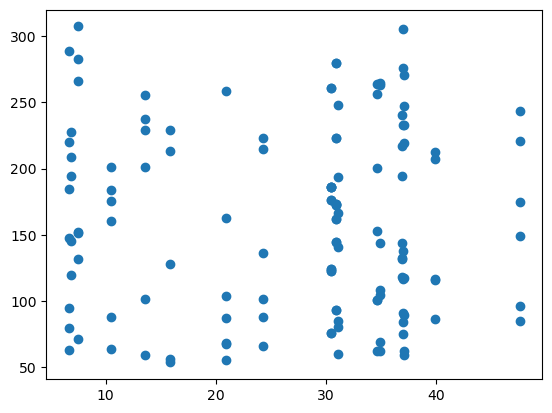

Teams with a positive EXP Points and their players final PPR scores (First ~130)
Number of items: 132
Mean X: 26.866060606060607
Median X: 30.86
STD X: 11.801588698691909
Mean Y: 159.0575757575757
Median Y: 151.7
STD Y: 69.41692725479882


In [31]:
x = full.loc[(full['PPR_PLAYERS'] > 50) & (full['EXP_TEAMS'] > 0) & (full['EXP_TEAMS'] < 51)]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 50) &(full['EXP_TEAMS'] > 0)& (full['EXP_TEAMS'] < 51)]['PPR_PLAYERS']
showDataXY(x, y, "Teams with a positive EXP Points and their players final PPR scores (First ~130)")

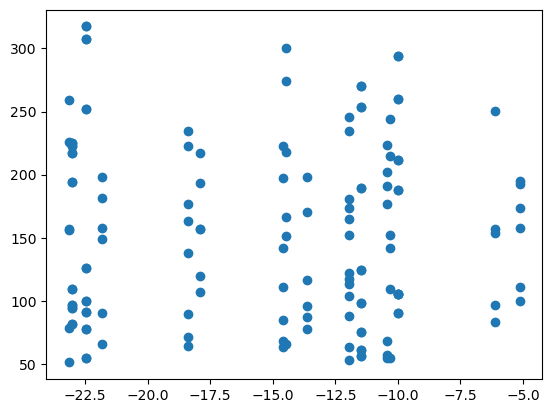

Teams with a negative EXP Points and their players final PPR scores (First ~130)
Number of items: 144
Mean X: -15.272500000000008
Median X: -13.65
STD X: 5.71949903669624
Mean Y: 152.5506944444444
Median Y: 150.5
STD Y: 71.52339437953373


In [32]:
x = full.loc[(full['PPR_PLAYERS'] > 50) & (full['EXP_TEAMS'] < 0) & (full['EXP_TEAMS'] > -24)]['EXP_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 50) &(full['EXP_TEAMS'] < 0)& (full['EXP_TEAMS'] > -24)]['PPR_PLAYERS']
showDataXY(x, y, "Teams with a negative EXP Points and their players final PPR scores (First ~130)")

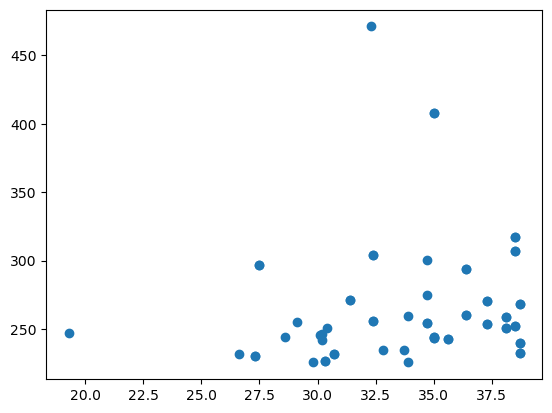

Teams with a negative EXP Points and their players final PPR scores
Number of items: 64
Mean X: 33.98906250000001
Median X: 34.85
STD X: 4.085013927721978
Mean Y: 265.77343749999994
Median Y: 253.6
STD Y: 44.46435434191811


In [16]:
x = full.loc[(full['PPR_PLAYERS'] > 225)  & (full['EXP_TEAMS'] < 0)]['TotalTeamSc%_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 225)  &(full['EXP_TEAMS'] < 0)]['PPR_PLAYERS']
showDataXY(x, y, "Team Score % of players with players who scored more than 225 points with a negative team expected points")

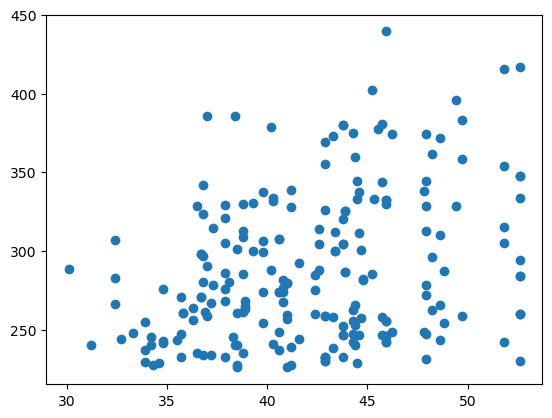

Team Score % of players with players who scored more than 225 points with a positive team expected points
Number of items: 215
Mean X: 42.221395348837184
Median X: 42.6
STD X: 5.100871091722548
Mean Y: 288.0432558139536
Median Y: 278.4
STD Y: 46.74540247876302


In [33]:
x = full.loc[(full['PPR_PLAYERS'] > 225) & (full['EXP_TEAMS'] > 0)]['TotalTeamSc%_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 225) &(full['EXP_TEAMS'] > 0)]['PPR_PLAYERS']
showDataXY(x, y, "Team Score % of players with players who scored more than 225 points with a positive team expected points")

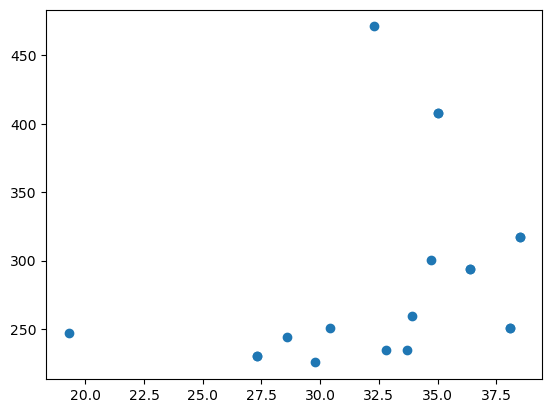

Team Score % of RBs with players who scored more than 225 points with a negative team expected points
Number of items: 19
Mean X: 32.95263157894736
Median X: 33.9
STD X: 4.9292064293749975
Mean Y: 287.7105263157895
Median Y: 250.6
STD Y: 70.39904430172679


In [35]:
x = full.loc[(full['PPR_PLAYERS'] > 225)  & (full['EXP_TEAMS'] < 0) & (full['Pos_PLAYERS'] == 'RB')]['TotalTeamSc%_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 225)  &(full['EXP_TEAMS'] < 0) & (full['Pos_PLAYERS'] == 'RB')]['PPR_PLAYERS']
showDataXY(x, y, "Team Score % of RBs with players who scored more than 225 points with a negative team expected points")

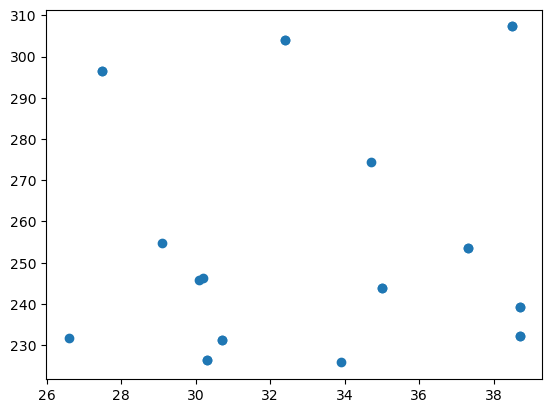

Team Score % of players with WRs who scored more than 225 points with a negative team expected points
Number of items: 24
Mean X: 33.45
Median X: 33.15
STD X: 4.134057907505493
Mean Y: 256.17083333333346
Median Y: 244.8
STD Y: 29.634637183783656


In [34]:
x = full.loc[(full['PPR_PLAYERS'] > 225)  & (full['EXP_TEAMS'] < 0) & (full['Pos_PLAYERS'] == 'WR')]['TotalTeamSc%_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 225)  &(full['EXP_TEAMS'] < 0) & (full['Pos_PLAYERS'] == 'WR')]['PPR_PLAYERS']
showDataXY(x, y, "Team Score % of players with WRs who scored more than 225 points with a negative team expected points")

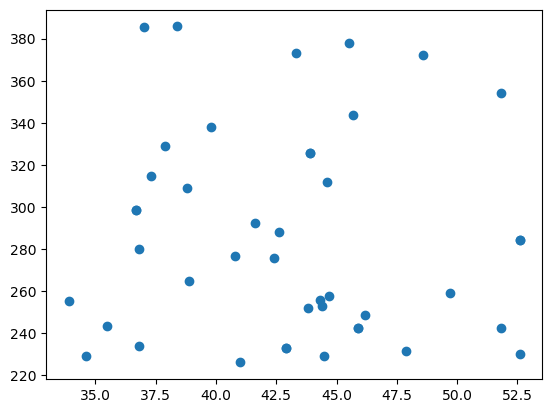

Team Score % of players with RBs who scored more than 225 points with a positive team expected points
Number of items: 43
Mean X: 42.965116279069775
Median X: 43.3
STD X: 5.171896756276737
Mean Y: 285.6720930232558
Median Y: 276.6
STD Y: 49.07069402588084


In [36]:
x = full.loc[(full['PPR_PLAYERS'] > 225)  & (full['EXP_TEAMS'] > 0) & (full['Pos_PLAYERS'] == 'RB')]['TotalTeamSc%_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 225)  &(full['EXP_TEAMS'] > 0) & (full['Pos_PLAYERS'] == 'RB')]['PPR_PLAYERS']
showDataXY(x, y, "Team Score % of players with RBs who scored more than 225 points with a positive team expected points")

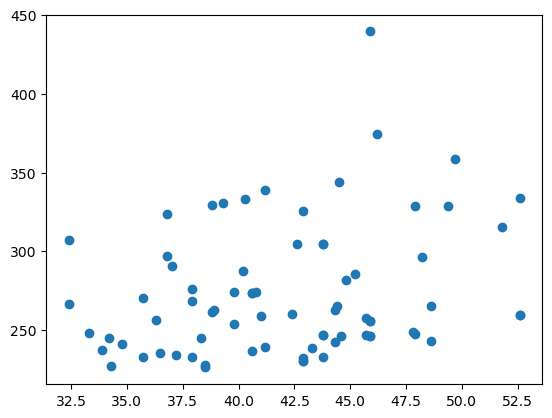

Team Score % of players with WRs who scored more than 225 points with a poisitve team expected points
Number of items: 75
Mean X: 42.05333333333335
Median X: 42.6
STD X: 5.012372080549675
Mean Y: 273.51199999999994
Median Y: 260.1
STD Y: 41.19956362928185


In [37]:
x = full.loc[(full['PPR_PLAYERS'] > 225)  & (full['EXP_TEAMS'] > 0) & (full['Pos_PLAYERS'] == 'WR')]['TotalTeamSc%_TEAMS']
y = full.loc[(full['PPR_PLAYERS'] > 225)  &(full['EXP_TEAMS'] > 0) & (full['Pos_PLAYERS'] == 'WR')]['PPR_PLAYERS']
showDataXY(x, y, "Team Score % of players with WRs who scored more than 225 points with a poisitve team expected points")

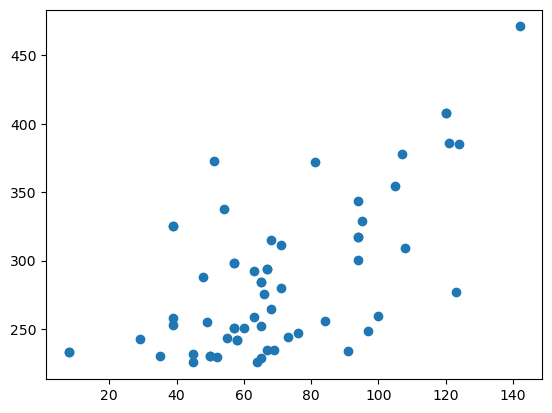

Team Score % of players with RBs who scored more than 225 points with a positive team expected points
Number of items: 62
Mean X: 70.09677419354838
Median X: 65.0
STD X: 28.004513498877845
Mean Y: 286.29677419354823
Median Y: 270.15
STD Y: 55.868170262144616


In [23]:
x = full.loc[(full['PPR_PLAYERS'] > 225) & (full['Pos_PLAYERS'] == 'RB')]['Tgts_PLAYERS']
y = full.loc[(full['PPR_PLAYERS'] > 225)  &(full['Pos_PLAYERS'] == 'RB')]['PPR_PLAYERS']
showDataXY(x, y, "Team Score % of players with RBs who scored more than 225 points with a positive team expected points")